<a href="https://colab.research.google.com/github/JOSEPHREDDY07/web_scrapper/blob/master/1_scraping_poshmark_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import HTML

HTML("""
<style>
    div.text_cell_render, .CodeMirror pre, div.output {
        font-size: 1.2em;
        line-height: 1.2em;
    }
    .container {
        width: 80%;
    }
</style>
""")

# Scraping Poshmark

This notebook walks through how to scrape listings from [Poshmark.com](https://poshmark.com/). Poshmark is a social commerce platform where people buy and sell new and used clothing, shoes and accessories.

![preview](images/poshmark-preview.png)


<br>

## Webpages 101

Websites are built using HTML and CSS. HTML provides the layout for websites. CSS provides the styling like font sizes, colors and spacing.

Scraping takes advantage of the inherent structure on webpages. We find data by using the repeating HTML elements and CSS classes on pages. 

CSS classes are repeatable styling given to components with similar styling. For example, the item cards on Poshmark, all have the same exact look and feel, so their HTML code looks rather similar.

Check out: [Diesel Jeans](https://poshmark.com/brand/Diesel-Men-Jeans?sort_by=added_desc) and use the Google Chrome Inspector.
<br><br>

![Diesel Code](images/diesel-code.png)

<br>

## Scrape the denim listings

We'll use `requests` to pull down the website. Then, we'll print out the response variable which contains the HTML code.

In [2]:
from requests import get

url = "https://poshmark.com/brand/Diesel-Men-Jeans?sort_by=added_desc"
response = get(url)
print(response.text[:500])

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" data-vue-meta-server-rendered="true" data-vue-meta="%7B%22lang%22:%7B%221%22:%22en%22%7D,%22xml:lang%22:%7B%221%22:%22en%22%7D,%22xmlns%22:%7B%221%22:%22http://www.w3.org/1999/xhtml%22%7D,%22data-vue-meta-server-rendered%22:%7B%221%22:true%7D%7D">
  <head>
    <!-- NREUM: (0) -->
    <title>Diesel Jeans for Men - Poshmark</title>
    <meta data-vue-meta="1" charset="utf-8"><meta data-vue-meta="1" http-equiv="X-UA-


We can use `beautifulsoup` to parse the raw HTML. This is a package specially made for accessing HTML elements.

In [4]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

We can use built-in methods to search for the repeating tiles in the markup. We take advantage of CSS classes here.

In [5]:
clothing_containers = html_soup.find_all('div', class_ = 'tile')
print(type(clothing_containers))
print(len(clothing_containers))

<class 'bs4.element.ResultSet'>
48


Let's take a look at the first tile.

In [6]:
first_tile = clothing_containers[0]
print(first_tile)

<div class="tile col-x12 col-l6 col-s8"><div class="card card--small"><a class="tile__covershot" data-et-element-type="image" data-et-name="listing" data-et-prop-listing_id="5eb4b23c06d59c17338d34a8" data-et-prop-location="listing_tile" data-et-prop-unit_position="0" href="/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8"><div class="img__container img__container--square"><img alt="Diesel jeans 40x32 (2316)" data-src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg" src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg"/></div><!-- --></a><div class="item__details"><div class="title__condition__container"><a class="tile__title tc--b" data-et-element-type="link" data-et-name="listing" data-et-prop-listing_id="5eb4b23c06d59c17338d34a8" data-et-prop-location="listing_tile" data-et-prop-unit_position="0" href="/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c173

`BeautifulSoup` has a `prettify` method which allows use to make HTML code more readable with proper indentation.

In [7]:
print(first_tile.prettify())

<div class="tile col-x12 col-l6 col-s8">
 <div class="card card--small">
  <a class="tile__covershot" data-et-element-type="image" data-et-name="listing" data-et-prop-listing_id="5eb4b23c06d59c17338d34a8" data-et-prop-location="listing_tile" data-et-prop-unit_position="0" href="/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8">
   <div class="img__container img__container--square">
    <img alt="Diesel jeans 40x32 (2316)" data-src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg" src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg"/>
   </div>
   <!-- -->
  </a>
  <div class="item__details">
   <div class="title__condition__container">
    <a class="tile__title tc--b" data-et-element-type="link" data-et-name="listing" data-et-prop-listing_id="5eb4b23c06d59c17338d34a8" data-et-prop-location="listing_tile" data-et-prop-unit_position="0" href="/listing/Dies

## Extract the values

Now that we have the card isolated, we can extract the specific data points:
- Item Title
- Item Price
- Item Size
- Item Brand
- Item Page Link
- Item Image Link

In [8]:
# Item Title
first_title = first_tile.find('a', class_='tile__title')
print(first_title)

<a class="tile__title tc--b" data-et-element-type="link" data-et-name="listing" data-et-prop-listing_id="5eb4b23c06d59c17338d34a8" data-et-prop-location="listing_tile" data-et-prop-unit_position="0" href="/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8">
          Diesel jeans 40x32 (2316)
        </a>


In [9]:
first_title = first_tile.find('a', class_='tile__title').get_text()
print(first_title)


          Diesel jeans 40x32 (2316)
        


In [10]:
first_title = first_tile.find('a', class_='tile__title').get_text(strip=True)
print(first_title)

Diesel jeans 40x32 (2316)


<br>

In [11]:
# Item Price
first_price = first_tile.find('span', class_="fw--bold")
print(first_price)

<span class="p--t--1 fw--bold">
          $99
        </span>


In [12]:
first_price = first_tile.find('span', class_="fw--bold").get_text(strip=True)
print(first_price)

$99


<br>

In [13]:
# Item Size
first_size = first_tile.find('a', class_="tile__details__pipe__size").get_text(strip=True)
print(first_size)

Size: 40


<br>

In [14]:
# Item Brand
first_brand = first_tile.find('a', class_="tile__details__pipe__brand").get_text(strip=True)
print(first_brand)

Diesel


<br>

In [15]:
# Item Detail URL
first_link = first_tile.find('a', class_='tile__title').get('href')
print(first_link)

/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8


In [16]:
first_link = 'http://www.poshmark.com' + first_tile.find('a', class_='tile__title').get('href')
print(first_link)

http://www.poshmark.com/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8


<br>

In [17]:
# Item Image URL
first_image = first_tile.find('img')
print(first_image)

<img alt="Diesel jeans 40x32 (2316)" data-src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg" src="https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg"/>


In [18]:
first_image = first_tile.find('img').get('src')
print(first_image)

https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg


<br>

## Format the data

We scraped the raw data. However, all the data are strings. We need to convert them to the appropriate types.

In [19]:
print('Title: ', first_title)
print('Price: ', first_price)
print('Size: ', first_size)
print('Brand: ', first_brand)
print('Link: ', first_link)
print('Image: ', first_image)

Title:  Diesel jeans 40x32 (2316)
Price:  $99
Size:  Size: 40
Brand:  Diesel
Link:  http://www.poshmark.com/listing/Diesel-jeans-40x32-2316-5eb4b23c06d59c17338d34a8
Image:  https://di2ponv0v5otw.cloudfront.net/posts/2020/05/07/5eb4b23c06d59c17338d34a8/s_5eb4b24412d880e07e2e0b42.jpg


The title and links can stay the same. However, we will need to convert price and size to `int`.

In [20]:
fixed_price = first_price.replace('$', '')
print(type(fixed_price))
print(fixed_price)

<class 'str'>
99


In [21]:
fixed_price = int(first_price.replace('$', ''))
print(type(fixed_price))
print(fixed_price)

<class 'int'>
99


In [22]:
fixed_size = int(first_size.replace('Size: ', ''))
print(type(fixed_size))
print(fixed_size)

<class 'int'>
40


<br>

## Extracting a new feature

If you took a close look at the image URL, you can see the path actually shows when the posting was created. Let's extract that.

In [23]:
start_idx = first_image.find('2020')
print(start_idx)

43


In [24]:
end_idx = start_idx + 10
raw_date = first_image[start_idx:end_idx]
print(raw_date)

2020/05/07


In [25]:
from dateutil.parser import parse

first_date = parse(raw_date)
print(first_date)

2020-05-07 00:00:00


We can find the approximate days the item has been listed.

In [26]:
from datetime import datetime

now = datetime.now()
diff = abs((first_date-now).days)
print(diff)

2


<div class="alert alert-info">

<b>Note:</b> In a professional workflow, you would create separate versions of the data.

<br>

<ol>
    <li>Raw scraped data</li>
    <li>Type formatted data</li>
    <li>Data with new features</li>
</ol>

</div>

<br>

# 5 minute break

<br>

## Refactor code, create functions

Here we'll refactor our code and create functions to extract all the data. A "good" function follows these guidelines:

- Is sensibly named
- Has a single responsibility
- Includes a docstring
- Returns a value
- Is not longer than 50 lines

In [0]:
from dateutil.parser import parse
from datetime import datetime

def download_page(url):
    "Download HTML source for a given URL"
    response = get(url)
    return response

def create_soup(source):
    "Convert HTML source to BeautifulSoup object"
    soup = BeautifulSoup(source.text, 'html.parser')
    return soup

def extract_tiles(soup):
    "Extract all the clothing tile elements"
    containers = soup.find_all('div', class_ = 'tile')
    return containers

def extract_title(tile):
    "Extract the title string from a tile"
    title = tile.find('a', class_='tile__title').get_text(strip=True)
    return title

def extract_price(tile):
    "Extract the price integer from a tile"
    price_string = tile.find('span', class_="fw--bold").get_text(strip=True)
    price = int(price_string.replace('$', ''))
    return price

def extract_size(tile):
    "Extract the size integer from a tile"
    size_string = tile.find('a', class_="tile__details__pipe__size").get_text(strip=True)
    size = int(size_string.replace('Size: ', ''))
    return size

def extract_brand(tile):
    "Extract the brand string from a tile"
    brand = tile.find('a', class_="tile__details__pipe__brand").get_text(strip=True)
    return brand

def extract_link(tile):
    "Extract the link string from a tile"
    partial_link = tile.find('a', class_='tile__title').get('href')
    link = 'http://www.poshmark.com' + partial_link
    return link

def extract_image(tile):
    "Extract the image link string from a tile"
    image = tile.find('img').get('data-src')
    return image
    
def extract_date(url):
    "Extract the posting date from a url"
    start = url.find('20')
    end = start + 10
    raw_date = url[start:end]
    date = parse(raw_date)
    return date

def find_difference(date):
    "Find the amount of days an item has been listed"
    now = datetime.now()
    diff = abs((date-now).days)
    return diff

In [0]:
def combine_data(tile):
    "Run independent functions and return object of all values"
    try:
        title = extract_title(tile)
    except:
        title = ''
        
    try:
        price = extract_price(tile)
    except: 
        price = ''
        
    try:
        size = extract_size(tile)
    except:
        size = ''
    
    try:
        brand = extract_brand(tile)
    except:
        brand = ''
    
    try: 
        link = extract_link(tile)
    except:
        link = ''
        
    try:
        image = extract_image(tile)
    except:
        image = ''
        
    try:
        date = extract_date(image)
        difference = find_difference(date)
    except:
        date = ''
        difference = ''
        
    return {
        'title': title,
        'price': price,
        'size': size,
        'brand': brand,
        'link': link,
        'image': image,
        'date': date,
        'difference': difference 
    }

## Extract all tiles on initial page

Now we can use the function to extract all the data from the page.

In [0]:
url = "https://poshmark.com/brand/Naked_&_Famous_Denim-Men-Jeans"

page = download_page(url)
soup_obj = create_soup(page)
item_tiles = extract_tiles(soup_obj)
item_objs = [combine_data(tile) for tile in item_tiles]

In [30]:
print(len(item_objs))

48


In [31]:
print(item_objs[0])
print('-------')
print(item_objs[45])

{'title': 'Naked & Famous Weird Guy Twill Selvedge Jeans', 'price': 99, 'size': 30, 'brand': 'Naked & Famous Denim', 'link': 'http://www.poshmark.com/listing/Naked-Famous-Weird-Guy-Twill-Selvedge-Jeans-5d6a8954138e18c4f74a7923', 'image': 'https://di2ponv0v5otw.cloudfront.net/posts/2019/08/31/5d6a8954138e18c4f74a7923/s_5d6a8976bb22e38dac0d6653.jpg', 'date': datetime.datetime(2019, 8, 31, 0, 0), 'difference': 252}
-------
{'title': 'NAKED & FAMOUS DARK WASH DENIM STRETCH JEANS', 'price': 55, 'size': 28, 'brand': 'Naked & Famous Denim', 'link': 'http://www.poshmark.com/listing/NAKED-FAMOUS-DARK-WASH-DENIM-STRETCH-JEANS-5eb1fae471766048e13ba840', 'image': 'https://di2ponv0v5otw.cloudfront.net/posts/2020/05/05/5eb1fae471766048e13ba840/s_5eb1fb876f6c9129cf1ee0d9.jpeg', 'date': datetime.datetime(2020, 5, 5, 0, 0), 'difference': 4}


In [32]:
from pprint import pprint

pprint(item_objs[0])

{'brand': 'Naked & Famous Denim',
 'date': datetime.datetime(2019, 8, 31, 0, 0),
 'difference': 252,
 'image': 'https://di2ponv0v5otw.cloudfront.net/posts/2019/08/31/5d6a8954138e18c4f74a7923/s_5d6a8976bb22e38dac0d6653.jpg',
 'link': 'http://www.poshmark.com/listing/Naked-Famous-Weird-Guy-Twill-Selvedge-Jeans-5d6a8954138e18c4f74a7923',
 'price': 99,
 'size': 30,
 'title': 'Naked & Famous Weird Guy Twill Selvedge Jeans'}


<div class="alert alert-warning">

<b>Note:</b> There are hundreds of listings, but we can only scrape the first 48.

<br>

<p>Modern websites use JavaScript to load additional results to prevent long initial load times. Our initial page download only includes the first set of listings. If you want to extract all the listings, you will have to use a headless browser. It creates a Chrome/Firefox instance in the background to mimic a real page visit.</p>

<br>

<p>That is a bit more complicated and out of the scope for now. I can demonstrate in a future talk.</p>

</div>

## Extract other denim brands

Let's extract the data for other denim brands as well.

In [0]:
brands = ['J._Crew', 'Naked_&_Famous_Denim', "Levi's", 'Diesel']
store = []

for tag in brands:
    url = f"https://poshmark.com/brand/{tag}-Men-Jeans"
    page = download_page(url)
    soup_obj = create_soup(page)
    item_tiles = extract_tiles(soup_obj)
    item_objs = [combine_data(tile) for tile in item_tiles]
    store.append(item_objs)

In [34]:
print(len(store))
print(len(store[0]))

4
48


In [0]:
brands = ['J._Crew', 'Naked_&_Famous_Denim', "Levi's", 'Diesel']
store = []

for tag in brands:
    url = f"https://poshmark.com/brand/{tag}-Men-Jeans"
    page = download_page(url)
    soup_obj = create_soup(page)
    item_tiles = extract_tiles(soup_obj)
    item_objs = [combine_data(tile) for tile in item_tiles]
    store.extend(item_objs)

In [36]:
print(len(store))
print(len(store[0]))

192
8


In [38]:
print((store[0]))

{'title': 'J. Crew Straight Leg Denim Jeans', 'price': 25, 'size': 29, 'brand': 'J. Crew', 'link': 'http://www.poshmark.com/listing/J-Crew-Straight-Leg-Denim-Jeans-5e4b0679f68375377f9b9ada', 'image': 'https://di2ponv0v5otw.cloudfront.net/posts/2020/02/17/5e4b0679f68375377f9b9ada/s_5e4b067aa20dfc087f689804.jpeg', 'date': datetime.datetime(2020, 2, 17, 0, 0), 'difference': 82}


## Examing the scraped data

You can bring the data into `pandas` for further examination.

In [37]:
import pandas as pd

df = pd.DataFrame(store)
print(df.info())
print('')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       192 non-null    object        
 1   price       192 non-null    int64         
 2   size        192 non-null    object        
 3   brand       192 non-null    object        
 4   link        192 non-null    object        
 5   image       192 non-null    object        
 6   date        192 non-null    datetime64[ns]
 7   difference  192 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.1+ KB
None

                                             title  ...  difference
0                 J. Crew Straight Leg Denim Jeans  ...          82
1            J.CREW MENS “THE DRIGGS” SKINNY JEANS  ...         472
2   J. Crew 770 Dark Wash Straight Fit Jeans 32x32  ...         208
3  NWOT J. Crew Style 484 Dark Wash Slim Fit Jeans  ...          25


In [0]:
df['length'] = df['title'].map(lambda x: len(x))

In [40]:
df.head()

,title,price,size,brand,link,image,date,difference,length
0,J. Crew Straight Leg Denim Jeans,25,29,J. Crew,http://www.poshmark.com/listing/J-Crew-Straigh...,https://di2ponv0v5otw.cloudfront.net/posts/202...,2020-02-17,82,32
1,J.CREW MENS “THE DRIGGS” SKINNY JEANS,30,31,J. Crew,http://www.poshmark.com/listing/JCREW-MENS-THE...,https://di2ponv0v5otw.cloudfront.net/posts/201...,2019-01-23,472,37
2,J. Crew 770 Dark Wash Straight Fit Jeans 32x32,53,32,J. Crew,http://www.poshmark.com/listing/J-Crew-770-Dar...,https://di2ponv0v5otw.cloudfront.net/posts/201...,2019-10-14,208,46
3,NWOT J. Crew Style 484 Dark Wash Slim Fit Jeans,35,31,J. Crew,http://www.poshmark.com/listing/NWOT-J-Crew-St...,https://di2ponv0v5otw.cloudfront.net/posts/202...,2020-04-14,25,47
4,J. Crew 484 extra slim white jeans size 31x32,36,31,J. Crew,http://www.poshmark.com/listing/J-Crew-484-ext...,https://di2ponv0v5otw.cloudfront.net/posts/201...,2019-11-23,168,45


In [41]:
numeric_df = df[['brand', 'price', 'size', 'difference', 'length']]
numeric_df.head()

,brand,price,size,difference,length
0,J. Crew,25,29,82,32
1,J. Crew,30,31,472,37
2,J. Crew,53,32,208,46
3,J. Crew,35,31,25,47
4,J. Crew,36,31,168,45


In [42]:
# Check for extreme values
numeric_df.describe()

,price,difference,length
count,192.000000,192.000000,192.000000
mean,52.546875,154.692708,40.156250
std,33.365780,187.843993,9.768877
min,13.000000,2.000000,10.000000
25%,30.000000,39.750000,34.750000
50%,43.500000,87.500000,44.000000
75%,65.000000,181.750000,47.000000
max,180.000000,1257.000000,50.000000


In [43]:
# Compare medians by brand
numeric_df.groupby('brand')['price', 'difference', 'length'].median().reset_index().rename(
    columns={'brand':'Brand', 'price':'Price', 'difference':'Days Listed', 'length':'Title Length'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Brand,Price,Days Listed,Title Length
0,Diesel,50.0,81.0,44.0
1,J. Crew,35.0,114.5,42.5
2,Levi's,30.0,71.5,42.0
3,Naked & Famous Denim,70.0,84.5,45.5


In [0]:
# Export to CSV
# df.to_csv('data/source_data.csv')
# numeric_df.to_csv('data/numeric_data.csv')

## Visualizing the distributions

Use `matplotlib` to plot and analyze the distributions in our data.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

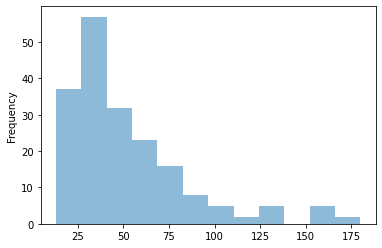

In [46]:
df['price'].plot.hist(bins=12, alpha=0.5);

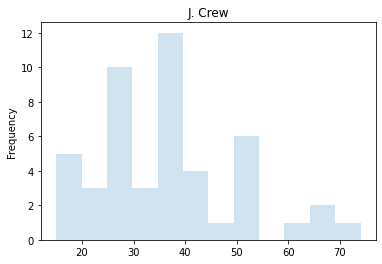

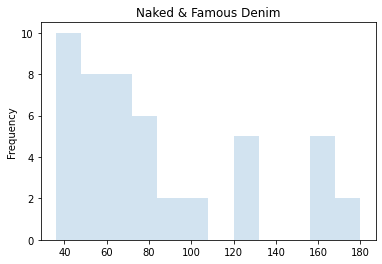

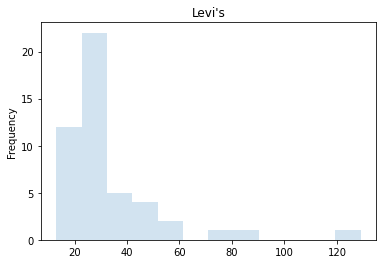

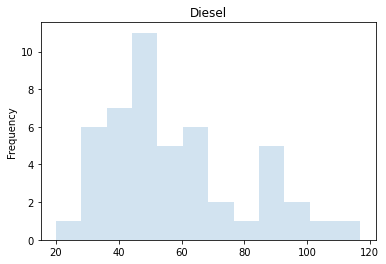

In [47]:
distinct_keys = df['brand'].unique()
for key in distinct_keys:
    plt.figure();
    df_subset = df[df.brand==key]
    df_subset['price'].plot.hist(bins=12, alpha=0.2, title=key);

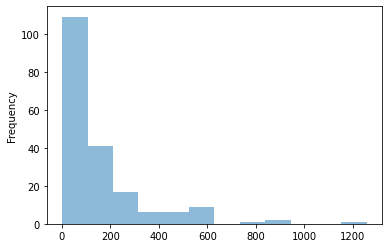

In [48]:
# Distribution of days listed
df['difference'].plot.hist(bins=12, alpha=0.5);

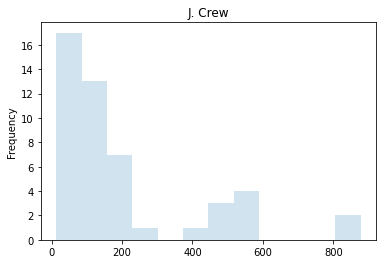

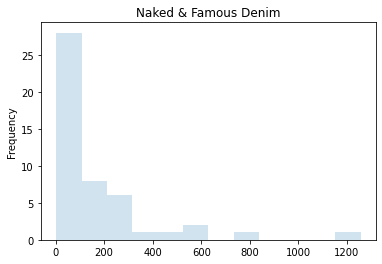

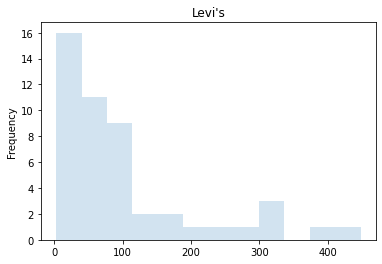

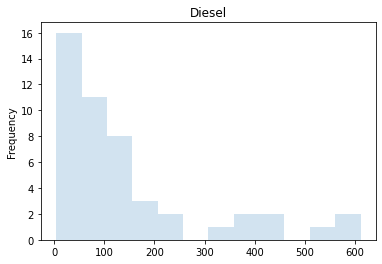

In [49]:
distinct_keys = df['brand'].unique()
for key in distinct_keys:
    plt.figure();
    df_subset = df[df.brand==key]
    df_subset['difference'].plot.hist(bins=12, alpha=0.2, title=key);

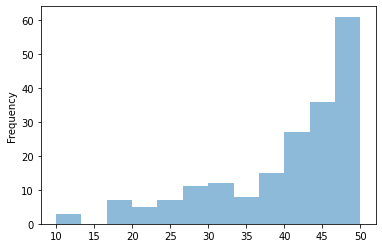

In [50]:
# Distribution of title length
df['length'].plot.hist(bins=12, alpha=0.5);